In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/Tst/pd_speech_features"

# **TQWT Features**

svm
SVM accuracy is 0.8552631578947368
              precision    recall  f1-score   support

     Healthy       0.62      0.67      0.65        15
   Parkinson       0.92      0.90      0.91        61

    accuracy                           0.86        76
   macro avg       0.77      0.78      0.78        76
weighted avg       0.86      0.86      0.86        76

Confusion matrix, without normalization


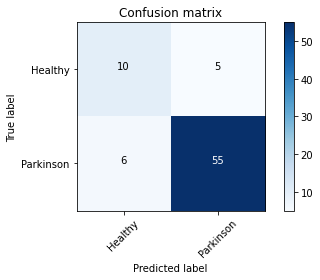

Decision Tree
Decision Tree accuracy is 0.8552631578947368
              precision    recall  f1-score   support

     Healthy       0.61      0.73      0.67        15
   Parkinson       0.93      0.89      0.91        61

    accuracy                           0.86        76
   macro avg       0.77      0.81      0.79        76
weighted avg       0.87      0.86      0.86        76

Confusion matrix, without normalization


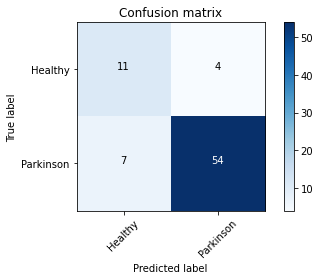

SGD accuracy is 0.7631578947368421
              precision    recall  f1-score   support

     Healthy       0.45      0.87      0.59        15
   Parkinson       0.96      0.74      0.83        61

    accuracy                           0.76        76
   macro avg       0.70      0.80      0.71        76
weighted avg       0.86      0.76      0.79        76

Confusion matrix, without normalization


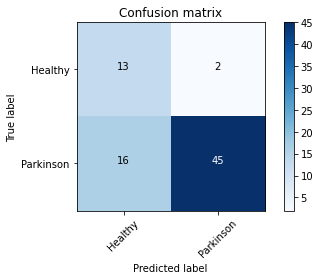

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LR
LR accuracy is 0.8026315789473685
              precision    recall  f1-score   support

     Healthy       0.50      0.80      0.62        15
   Parkinson       0.94      0.80      0.87        61

    accuracy                           0.80        76
   macro avg       0.72      0.80      0.74        76
weighted avg       0.86      0.80      0.82        76

Confusion matrix, without normalization


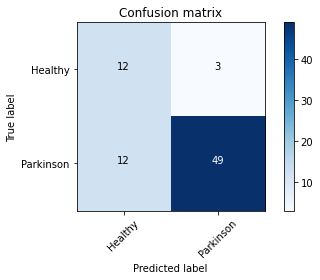

kNN
KNN accuracy is 0.9078947368421053
              precision    recall  f1-score   support

     Healthy       0.90      0.60      0.72        15
   Parkinson       0.91      0.98      0.94        61

    accuracy                           0.91        76
   macro avg       0.90      0.79      0.83        76
weighted avg       0.91      0.91      0.90        76

Confusion matrix, without normalization


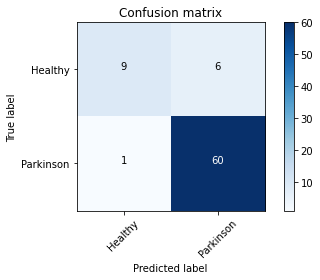

RF
RF accuracy is 0.9210526315789473
              precision    recall  f1-score   support

     Healthy       0.85      0.73      0.79        15
   Parkinson       0.94      0.97      0.95        61

    accuracy                           0.92        76
   macro avg       0.89      0.85      0.87        76
weighted avg       0.92      0.92      0.92        76

Confusion matrix, without normalization


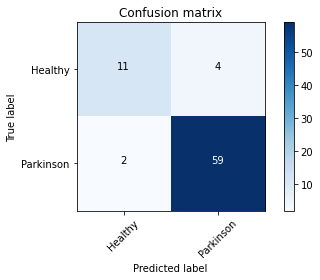

mlp
MLP accuracy is 0.8552631578947368
              precision    recall  f1-score   support

     Healthy       0.61      0.73      0.67        15
   Parkinson       0.93      0.89      0.91        61

    accuracy                           0.86        76
   macro avg       0.77      0.81      0.79        76
weighted avg       0.87      0.86      0.86        76

Confusion matrix, without normalization


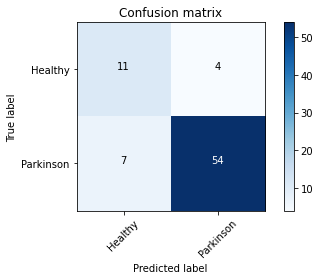

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,roc_auc_score, f1_score
from sklearn.metrics import precision_recall_fscore_support, f1_score

from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import Adadelta, RMSprop, SGD, Adam

import matplotlib.pyplot as plt
import scipy.sparse as scs
from statistics import mean
import numpy as np, pandas as pd, io, csv
from numpy import empty
from keras.models import Sequential
import matplotlib.pyplot as plot

#Classifier Lib
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from  sklearn.tree import  DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 
import itertools    
from itertools import cycle


from scipy.signal import cwt, ricker,morlet,chirp
import tensorflow as tf
tf.random.set_seed(2)

filename='/content/pd_speech_features.csv'

data = pd.read_csv(filename, header = 1)


X = data.drop(['PPE'], axis=1 ).values
Y = data['PPE'].values



data2=pd.read_csv(filename, header = 1)

#Load TQWT DataSet
Fs1=data2.iloc[:,322:754]

#LOad Wavelet DataSet
Fs2=data2.iloc[:,140:322]

#LOad MFCC DataSet
Fs3=data2.iloc[:,56:140]

#Combination 2 or 3 DataSet
frames = [Fs1,Fs2,Fs3]
#Fs = pd.concat(frames,axis=1)
Fs=Fs1



#Load Lables
target=data2['class'].values

#Reshape and Split data to Train data and Test data
arrayofdata_ = np.array(Fs)

labels = np.array(target)

one_hot_labels = to_categorical(labels, num_classes=2)

x_train, x_test, y_train, y_test = train_test_split(arrayofdata_,
                                                          one_hot_labels,
                                                          test_size=0.1,shuffle=True,
                                                          random_state=42)




x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_train.shape[1],1))

#Reshape Data for MachinLearning Classifier
x_train1 = np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test1 = np.reshape(x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
y_train1 = np.argmax(y_train, axis=1)
y_test1 = np.argmax(y_test, axis=1)

scaler = StandardScaler()  
scaler.fit(x_train1)  
x_train1 = scaler.transform(x_train1)  
x_test1  = scaler.transform(x_test1) 
#############################################################################################################
#HC:Healthy Control Adn PD:Parkinson Disease
class_names=['Healthy','Parkinson']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()


#############################################################################################################

#SVM Classifier

#logreg = Pipeline([('clf', SVC(kernel = 'rbf', random_state = 42)),])     

svc = SVC(kernel='rbf', class_weight={0: 1.96875, 1: 0.6702127659574468}, C=1.0, random_state=1)
svc.fit(x_train1, y_train1)    
y_pred_svm = svc.predict(x_test1)
print('svm')
print('SVM accuracy is %s' % accuracy_score(y_pred_svm, y_test1))
print(classification_report(y_test1, y_pred_svm,target_names=class_names))

# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_svm)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

#############################################################################################################
#Decision Tree
DT  = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1, class_weight={0: 1.96875, 1: 0.6702127659574468})
DT.fit(x_train1, y_train1) 
y_pred_dt = DT.predict(x_test1)
print('Decision Tree')
print('Decision Tree accuracy is %s' % accuracy_score(y_pred_dt, y_test1))
print(classification_report(y_test1, y_pred_dt,target_names=class_names))
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_dt)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

#############################################################################################################
#SGD Classifier

sgd = Pipeline([
                ('clf', SGDClassifier(loss='hinge',class_weight={0: 1.96875, 1: 0.6702127659574468}, penalty='l2',alpha=1e-3, random_state=1, max_iter=5, tol=None)),
               ])
sgd.fit(x_train1, y_train1)

y_pred_sgd = sgd.predict(x_test1)
print('SGD accuracy is %s' % accuracy_score(y_pred_sgd, y_test1))
print(classification_report(y_test1, y_pred_sgd,target_names=class_names))
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_sgd)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

#############################################################################################################

#LR Classifier

logreg = Pipeline([('clf',LogisticRegression(n_jobs=1, class_weight={0: 1.96875, 1: 0.6702127659574468}, C=1e5)), ])              
logreg.fit(x_train1, y_train1)
y_pred_lr = logreg.predict(x_test1)
print('LR')
print('LR accuracy is %s' % accuracy_score(y_pred_lr, y_test1))
print(classification_report(y_test1, y_pred_lr,target_names=class_names))
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_lr)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

#############################################################################################################

#K-Nearest Neighbours Classifier   
    
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train1, y_train1)
y_pred_Knn = clf.predict(x_test1)
cm = confusion_matrix(y_test1, y_pred_Knn)

print('kNN') 
print('KNN accuracy is %s' % accuracy_score(y_pred_Knn, y_test1))
print(classification_report(y_test1, y_pred_Knn,target_names=class_names))
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_Knn)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

#############################################################################################################
#RandomForest Classifier

RF = RandomForestClassifier(n_estimators=1000,class_weight={0: 1.96875, 1: 0.6702127659574468}, max_depth=10, random_state=42).fit(x_train1, y_train1)  
y_pred_rf=RF.predict(x_test1)  
print('RF')
print('RF accuracy is %s' % accuracy_score(y_pred_rf, y_test1))
print(classification_report(y_test1, y_pred_rf,target_names=class_names))
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_rf)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

#############################################################################################################


#MLP Classifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=42).fit(x_train1, y_train1)  
y_pred_mlp=NN.predict(x_test1)  
print('mlp')
print('MLP accuracy is %s' % accuracy_score(y_pred_mlp, y_test1))
print(classification_report(y_test1, y_pred_mlp,target_names=class_names))
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_mlp)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

#############################################################################################################


# **TQWT +Wavelet + MFCC Features**

svm
SVM accuracy is 0.8947368421052632
              precision    recall  f1-score   support

     Healthy       0.77      0.67      0.71        15
   Parkinson       0.92      0.95      0.94        61

    accuracy                           0.89        76
   macro avg       0.84      0.81      0.82        76
weighted avg       0.89      0.89      0.89        76

Confusion matrix, without normalization


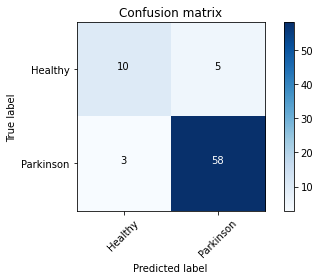

Decision Tree
Decision Tree accuracy is 0.7105263157894737
              precision    recall  f1-score   support

     Healthy       0.39      0.80      0.52        15
   Parkinson       0.93      0.69      0.79        61

    accuracy                           0.71        76
   macro avg       0.66      0.74      0.66        76
weighted avg       0.83      0.71      0.74        76

Confusion matrix, without normalization


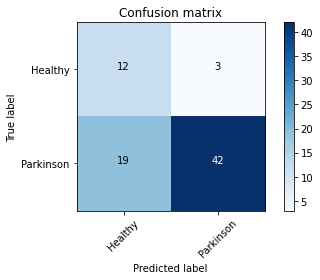

SGD accuracy is 0.8421052631578947
              precision    recall  f1-score   support

     Healthy       0.58      0.73      0.65        15
   Parkinson       0.93      0.87      0.90        61

    accuracy                           0.84        76
   macro avg       0.75      0.80      0.77        76
weighted avg       0.86      0.84      0.85        76

Confusion matrix, without normalization


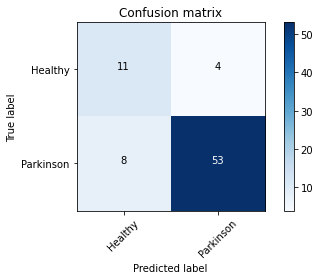

LR
LR accuracy is 0.881578947368421
              precision    recall  f1-score   support

     Healthy       0.69      0.73      0.71        15
   Parkinson       0.93      0.92      0.93        61

    accuracy                           0.88        76
   macro avg       0.81      0.83      0.82        76
weighted avg       0.88      0.88      0.88        76

Confusion matrix, without normalization


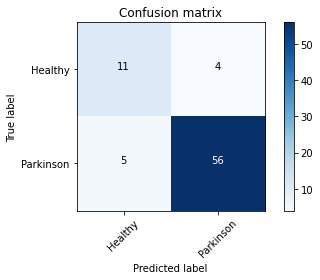

kNN
KNN accuracy is 0.868421052631579
              precision    recall  f1-score   support

     Healthy       0.73      0.53      0.62        15
   Parkinson       0.89      0.95      0.92        61

    accuracy                           0.87        76
   macro avg       0.81      0.74      0.77        76
weighted avg       0.86      0.87      0.86        76

Confusion matrix, without normalization


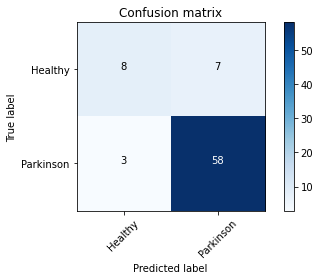

RF
RF accuracy is 0.881578947368421
              precision    recall  f1-score   support

     Healthy       0.80      0.53      0.64        15
   Parkinson       0.89      0.97      0.93        61

    accuracy                           0.88        76
   macro avg       0.85      0.75      0.78        76
weighted avg       0.88      0.88      0.87        76

Confusion matrix, without normalization


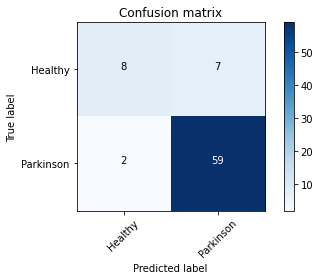

mlp
MLP accuracy is 0.9210526315789473
              precision    recall  f1-score   support

     Healthy       0.85      0.73      0.79        15
   Parkinson       0.94      0.97      0.95        61

    accuracy                           0.92        76
   macro avg       0.89      0.85      0.87        76
weighted avg       0.92      0.92      0.92        76

Confusion matrix, without normalization


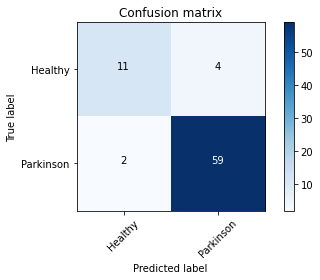

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,roc_auc_score, f1_score
from sklearn.metrics import precision_recall_fscore_support, f1_score

from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import Adadelta, RMSprop, SGD, Adam

import matplotlib.pyplot as plt
import scipy.sparse as scs
from statistics import mean
import numpy as np, pandas as pd, io, csv
from numpy import empty
from keras.models import Sequential
import matplotlib.pyplot as plot

#Classifier Lib
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from  sklearn.tree import  DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 
import itertools    
from itertools import cycle


from scipy.signal import cwt, ricker,morlet,chirp
import tensorflow as tf
tf.random.set_seed(2)

filename='/content/pd_speech_features.csv'

data = pd.read_csv(filename, header = 1)


X = data.drop(['PPE'], axis=1 ).values
Y = data['PPE'].values



data2=pd.read_csv(filename, header = 1)

#Load TQWT DataSet
Fs1=data2.iloc[:,322:754]

#Load Wavelet DataSet
Fs2=data2.iloc[:,140:322]

#Load MFCC DataSet
Fs3=data2.iloc[:,56:140]

#Combination 2 or 3 DataSet
frames = [Fs1,Fs2,Fs3]
Fs = pd.concat(frames,axis=1)


#Load Lables
target=data2['class'].values

#Reshape and Split data to Train data and Test data
arrayofdata_ = np.array(Fs)

labels = np.array(target)

one_hot_labels = to_categorical(labels, num_classes=2)

x_train, x_test, y_train, y_test = train_test_split(arrayofdata_,
                                                          one_hot_labels,
                                                          test_size=0.1,shuffle=True,
                                                          random_state=42)




x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_train.shape[1],1))

#Reshape Data for MachinLearning Classifier
x_train1 = np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test1 = np.reshape(x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
y_train1 = np.argmax(y_train, axis=1)
y_test1 = np.argmax(y_test, axis=1)

scaler = StandardScaler()  
scaler.fit(x_train1)  
x_train1 = scaler.transform(x_train1)  
x_test1  = scaler.transform(x_test1) 
#############################################################################################################
#HC:Healthy Control Adn PD:Parkinson Disease
class_names=['Healthy','Parkinson']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()


#############################################################################################################

#SVM Classifier

#logreg = Pipeline([('clf', SVC(kernel = 'rbf', random_state = 42)),])     

svc = SVC(kernel='rbf', class_weight={0: 1.96875, 1: 0.6702127659574468}, C=1.0, random_state=1)
svc.fit(x_train1, y_train1)    
y_pred_svm = svc.predict(x_test1)
print('svm')
print('SVM accuracy is %s' % accuracy_score(y_pred_svm, y_test1))
print(classification_report(y_test1, y_pred_svm,target_names=class_names))

# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_svm)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

#############################################################################################################
#Decision Tree
DT  = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1, class_weight={0: 1.96875, 1: 0.6702127659574468})
DT.fit(x_train1, y_train1) 
y_pred_dt = DT.predict(x_test1)
print('Decision Tree')
print('Decision Tree accuracy is %s' % accuracy_score(y_pred_dt, y_test1))
print(classification_report(y_test1, y_pred_dt,target_names=class_names))
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_dt)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

#############################################################################################################
#SGD Classifier

sgd = Pipeline([
                ('clf', SGDClassifier(loss='hinge',class_weight={0: 1.96875, 1: 0.6702127659574468}, penalty='l2',alpha=1e-3, random_state=1, max_iter=5, tol=None)),
               ])
sgd.fit(x_train1, y_train1)

y_pred_sgd = sgd.predict(x_test1)
print('SGD accuracy is %s' % accuracy_score(y_pred_sgd, y_test1))
print(classification_report(y_test1, y_pred_sgd,target_names=class_names))
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_sgd)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

#############################################################################################################

#LR Classifier

logreg = Pipeline([('clf',LogisticRegression(n_jobs=1, class_weight={0: 1.96875, 1: 0.6702127659574468}, C=1e5)), ])              
logreg.fit(x_train1, y_train1)
y_pred_lr = logreg.predict(x_test1)
print('LR')
print('LR accuracy is %s' % accuracy_score(y_pred_lr, y_test1))
print(classification_report(y_test1, y_pred_lr,target_names=class_names))
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_lr)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

#############################################################################################################

#K-Nearest Neighbours Classifier   
    
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train1, y_train1)
y_pred_Knn = clf.predict(x_test1)
cm = confusion_matrix(y_test1, y_pred_Knn)

print('kNN') 
print('KNN accuracy is %s' % accuracy_score(y_pred_Knn, y_test1))
print(classification_report(y_test1, y_pred_Knn,target_names=class_names))
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_Knn)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

#############################################################################################################
#RandomForest Classifier

RF = RandomForestClassifier(n_estimators=1000,class_weight={0: 1.96875, 1: 0.6702127659574468}, max_depth=10, random_state=42).fit(x_train1, y_train1)  
y_pred_rf=RF.predict(x_test1)  
print('RF')
print('RF accuracy is %s' % accuracy_score(y_pred_rf, y_test1))
print(classification_report(y_test1, y_pred_rf,target_names=class_names))
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_rf)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

#############################################################################################################


#MLP Classifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=42).fit(x_train1, y_train1)  
y_pred_mlp=NN.predict(x_test1)  
print('mlp')
print('MLP accuracy is %s' % accuracy_score(y_pred_mlp, y_test1))
print(classification_report(y_test1, y_pred_mlp,target_names=class_names))
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_mlp)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

#############################################################################################################
